LangGraph Basic Chatbot Tutorial:

Building Your First LangGraph Application
Welcome to this hands-on tutorial where you'll build a basic chatbot using LangGraph! This tutorial is based on the official LangGraph documentation and is designed to give you a solid foundation in LangGraph concepts.

🎯 Learning Objectives
By the end of this tutorial, you will:

✅ Understand what LangGraph is and why it's useful

✅ Know how to create and structure a StateGraph

✅ Learn about nodes, edges, and state management

✅ Build a functional chatbot from scratch

✅ Understand the basic LangGraph workflow

📋 What We'll Build
We'll create a simple chatbot that:

Maintains conversation state
Responds to user messages using an LLM
Demonstrates core LangGraph concepts
Forms the foundation for more advanced features
Let's get started! 🚀

Prerequisites
Before we start, make sure you have:

Python 3.8+ installed on your system

Access to an LLM provider that supports tool-calling features:

OpenAI (GPT-4, GPT-3.5-turbo)
Anthropic (Claude)
Google Gemini
Azure OpenAI
AWS Bedrock
API credentials for your chosen LLM provider

Basic Python knowledge - understanding of functions, dictionaries, and classes

💡 Tip: We recommend starting with OpenAI or Anthropic as they have excellent tool-calling capabilities and extensive documentation.

In [1]:
%pip uninstall -y langgraph langchain langchain-core langsmith


Found existing installation: langgraph 0.5.4
Uninstalling langgraph-0.5.4:
  Successfully uninstalled langgraph-0.5.4
Found existing installation: langchain 0.3.27
Uninstalling langchain-0.3.27:
  Successfully uninstalled langchain-0.3.27
Found existing installation: langchain-core 0.3.74
Uninstalling langchain-core-0.3.74:
  Successfully uninstalled langchain-core-0.3.74
Found existing installation: langsmith 0.4.14
Uninstalling langsmith-0.4.14:
  Successfully uninstalled langsmith-0.4.14
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install langgraph==0.5.4
%pip install langchain-core


  Using cached langgraph-0.5.4-py3-none-any.whl.metadata (6.8 kB)
  Using cached langchain_core-0.3.74-py3-none-any.whl.metadata (5.8 kB)
  Using cached langsmith-0.4.14-py3-none-any.whl.metadata (14 kB)
Using cached langgraph-0.5.4-py3-none-any.whl (143 kB)
Using cached langchain_core-0.3.74-py3-none-any.whl (443 kB)
Using cached langsmith-0.4.14-py3-none-any.whl (373 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [langgraph]/3 [langgraph]core]
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install "langchain[openai]" "langchain[anthropic]"
%pip install langsmith

  Using cached langchain-0.3.27-py3-none-any.whl.metadata (7.8 kB)
Using cached langchain-0.3.27-py3-none-any.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 📚 About LangSmith
LangSmith is LangChain's observability platform that helps you:

1)Debug your LangGraph applications

2)Monitor performance and costs

3)Test and evaluate your AI systems

4)Trace execution flows

💡 Pro Tip: Sign up for LangSmith to get detailed insights into your LangGraph applications. It's invaluable for development and debugg

### Step 2: Create StateGraph

In [4]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [5]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [6]:
graph_builder = StateGraph(State)

### Step 3 Set up of Language Model

In [7]:
import os
from langchain.chat_models import init_chat_model

In [ ]:
os.environ["OPENAI_API_KEY"] = ""
llm = init_chat_model("openai:gpt-4")

In [9]:
llm.invoke("Hi, how are you?")

AIMessage(content="As an artificial intelligence, I don't have feelings, but I'm ready and able to assist you. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 13, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'id': 'chatcmpl-C4XXlXfGqYJjBqxskhKVrt932rqpn', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--ba8cec12-3431-4b44-84dc-63aeda7159a2-0', usage_metadata={'input_tokens': 13, 'output_tokens': 28, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### Step 4: Add a Node
Now we'll add our first node to the graph. Nodes represent units of work and are typically regular Python functions.

🔧 Understanding Nodes

Input: Nodes receive the current State

Processing: They perform some work (like calling an LLM)

Output: They return a dictionary with state updates

Pattern: All LangGraph node functions follow this pattern

In [10]:
def chatbot(state: State):
    response = llm.invoke(state['messages'])
    return {"messages": [response]}

In [11]:
graph_builder.add_node("chatbot_node", chatbot)
graph_builder.add_edge(START, "chatbot_node")
graph_builder.add_edge("chatbot_node", END)

graph = graph_builder.compile()

📊 Graph Visualization:
  +-----------+  
  | __start__ |  
  +-----------+  
        *        
        *        
        *        
+--------------+ 
| chatbot_node | 
+--------------+ 
        *        
        *        
        *        
  +---------+    
  | __end__ |    
  +---------+    



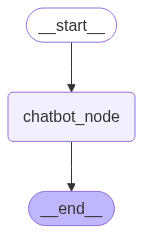

🎨 Professional diagram displayed above!

✅ Graph structure visualized!
📈 Our simple chatbot has one node connected to START


In [12]:
# Visualize our graph structure
print("📊 Graph Visualization:")
print("=" * 30)

# ASCII visualization (always works)
try:
    ascii_viz = graph.get_graph().draw_ascii()
    print(ascii_viz)
except Exception as e:
    print("ASCII visualization not available:", e)
    # Fallback simple visualization
    print("Simple Graph Structure:")
    print("┌─────────┐")
    print("│  START  │")
    print("└────┬────┘")
    print("     │")
    print("     ▼")
    print("┌─────────┐")
    print("│ chatbot │")
    print("└─────────┘")

print("\n" + "=" * 30)

# Try to display a more professional diagram (if dependencies are available)
try:
    from IPython.display import Image, display
    display(Image(graph.get_graph().draw_mermaid_png()))
    print("🎨 Professional diagram displayed above!")
except Exception as e:
    print("🎨 Professional visualization not available (this is normal)")
    print("💡 To enable: pip install 'langgraph[visualization]'")

print("\n✅ Graph structure visualized!")
print("📈 Our simple chatbot has one node connected to START")

In [13]:
def stream_graph_updates(user_input: str):
    """
    Stream updates from our graph execution.
    
    This function:
    1. Creates initial state with user message
    2. Streams graph execution results
    3. Displays assistant responses
    
    Args:
        user_input: The user's message
    """
    print(f"\n👤 User: {user_input}")
    print("🔄 Processing...")
    
    # Create initial state with user message
    initial_state = {
        "messages": [{"role": "user", "content": user_input}]
    }
    
    # Stream the graph execution
    for event in graph.stream(initial_state):
        for value in event.values():
            # Get the latest message (assistant's response)
            if value["messages"]:
                latest_message = value["messages"][-1]
                print(f"🤖 Assistant: {latest_message.content}")

# Test our chatbot with some sample interactions
print("🚀 Testing our LangGraph chatbot:")
print("=" * 50)

🚀 Testing our LangGraph chatbot:


In [14]:
stream_graph_updates("Hello")


👤 User: Hello
🔄 Processing...
🤖 Assistant: Hello! How can I assist you today?


In [15]:
stream_graph_updates("which number is bigger 10.5 and 10.1")


👤 User: which number is bigger 10.5 and 10.1
🔄 Processing...
🤖 Assistant: 10.5 is bigger than 10.1


In [ ]:
def book_ticket(input1):
    return str(input1) + " Ticket booked successfully!"
def book_hotel(input2):
    return str(input2) + " Hotel booked successfully!"

In [29]:
book_ticket("Hi")

'Hi Ticket booked successfully!'

In [30]:
book_hotel("Hello")

'Hello Hotel booked successfully!'

In [31]:
from langgraph.graph import MessageGraph 
workflow1 = MessageGraph()

In [32]:
workflow1.add_node("BookTicket", book_ticket)
workflow1.add_node("BookHotel", book_hotel)
workflow1.add_edge("BookTicket", "BookHotel")

In [33]:
workflow1.add_edge(START, "BookTicket")
workflow1.add_edge("BookHotel", END)
app1 = workflow1.compile()

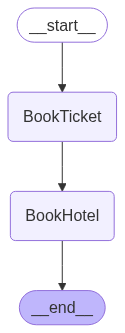

In [34]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

### AGENT APPLICATION

In [35]:
app1.invoke("Hi this is Manmath")

[HumanMessage(content='Hi this is Manmath', additional_kwargs={}, response_metadata={}, id='28a7c5c0-46c9-4c84-93d0-8b90fe78d277'),
 HumanMessage(content="[HumanMessage(content='Hi this is Manmath', additional_kwargs={}, response_metadata={}, id='28a7c5c0-46c9-4c84-93d0-8b90fe78d277')] Ticket booked successfully!", additional_kwargs={}, response_metadata={}, id='0c11d212-44a9-430c-8d90-c548b5b1e6e0'),
 HumanMessage(content='[HumanMessage(content=\'Hi this is Manmath\', additional_kwargs={}, response_metadata={}, id=\'28a7c5c0-46c9-4c84-93d0-8b90fe78d277\'), HumanMessage(content="[HumanMessage(content=\'Hi this is Manmath\', additional_kwargs={}, response_metadata={}, id=\'28a7c5c0-46c9-4c84-93d0-8b90fe78d277\')] Ticket booked successfully!", additional_kwargs={}, response_metadata={}, id=\'0c11d212-44a9-430c-8d90-c548b5b1e6e0\')] Hotel booked successfully!', additional_kwargs={}, response_metadata={}, id='988c30cc-fe66-471c-8c81-7353d1887c60')]

In [27]:
input = "Hi this is Manmath "
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from BookTicket
_______
[HumanMessage(content='Hi this is Manmath ', additional_kwargs={}, response_metadata={}, id='655652ba-0754-40a5-bae1-bf3b27b2c667')] Ticket booked successfully!


here is output from BookHotel
_______
[HumanMessage(content='Hi this is Manmath ', additional_kwargs={}, response_metadata={}, id='655652ba-0754-40a5-bae1-bf3b27b2c667'), HumanMessage(content="[HumanMessage(content='Hi this is Manmath ', additional_kwargs={}, response_metadata={}, id='655652ba-0754-40a5-bae1-bf3b27b2c667')] Ticket booked successfully!", additional_kwargs={}, response_metadata={}, id='ba6014cc-cb2e-4354-b326-93fbb46c6c3a')] Hotel booked successfully!


